In [2]:
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
if response.ok:
    dados = response.json()
    print(dados)
else:
    print("Erro ao carregar JSON:", response.status_code)

[{'customerID': '0002-ORFBO', 'Churn': 'No', 'customer': {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}, 'account': {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}, {'customerID': '0003-MKNFE', 'Churn': 'No', 'customer': {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}, 'account': {'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMeth

In [4]:
import pandas as pd
import requests

# URL RAW do arquivo JSON
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

# Requisição para obter o conteúdo
response = requests.get(url)

# Verifica se a resposta foi bem sucedida
if response.ok:
    dados_json = response.json()

    # Converte para DataFrame
    df = pd.DataFrame(dados_json)

    # Exibe as primeiras linhas
    print(df.head())
else:
    print("Erro ao carregar JSON:", response.status_code)


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [6]:
import pandas as pd
import requests

# URL RAW do JSON
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)

if response.ok:
    dados_json = response.json()

    # Normaliza os dados aninhados
    df = pd.json_normalize(dados_json)

    print(df.head())
else:
    print("Erro ao carregar JSON:", response.status_code)


   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [8]:
# Agrupar por gênero e ver taxa de churn
df.groupby('customer.gender')['Churn'].value_counts(normalize=True)


customer.gender  Churn
Female           No       0.709633
                 Yes      0.261414
                          0.028953
Male             No       0.714286
                 Yes      0.253061
                          0.032653
Name: proportion, dtype: float64

In [ ]:
# Filtrar apenas clientes que cancelaram
df[df['Churn'] == 'Yes']

In [12]:
# Separar colunas por prefixo
customer_df = df.filter(regex='^customer\.')
phone_df = df.filter(regex='^phone\.')
internet_df = df.filter(regex='^internet\.')
account_df = df.filter(regex='^account\.')


In [13]:
# Remove os prefixos dos nomes das colunas
df.columns = df.columns.str.replace(r'^.*?\.', '', regex=True)

print(df.columns)


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


In [30]:
print(df.info())
print(df.head())
print(df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_cliente        7267 non-null   object 
 1   cancelou          7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [29]:
# Garante que a coluna 'mensalidade' está como float
df['mensalidade'] = pd.to_numeric(df['mensalidade'], errors='coerce')

KeyError: 'mensalidade'

In [31]:
df['Contas_Diarias'] = (df['Monthly'] / 30).round(2)


In [34]:
print(df[['id_cliente', 'Monthly', 'Contas_Diarias']].head())



   id_cliente  Monthly  Contas_Diarias
0  0002-ORFBO     65.6            2.19
1  0003-MKNFE     59.9            2.00
2  0004-TLHLJ     73.9            2.46
3  0011-IGKFF     98.0            3.27
4  0013-EXCHZ     83.9            2.80


Conhecendo o Dataset

In [35]:
print(df.info())       # mostra tipos e quantidade de valores não nulos
print(df.head())       # primeiras linhas para ver os dados
print(df.columns.tolist())  # lista todas as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_cliente        7267 non-null   object 
 1   cancelou          7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


cancelou: Indica se o cliente cancelou ou não (Yes/No). É a variável que queremos prever.

gender (gênero)

SeniorCitizen (cliente idoso ou não)

Partner (tem parceiro)

Dependents (tem dependentes)


Análise descritiva

In [37]:
import pandas as pd

# Selecionar as colunas numéricas importantes para análise
colunas_numericas = ['tenure', 'Monthly', 'Total', 'Contas_Diarias', 'SeniorCitizen']

# Converter 'Total' para numérico caso esteja como objeto (texto)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Calcular estatísticas descritivas básicas
descricao = df[colunas_numericas].describe()
print("Estatísticas descritivas básicas:\n", descricao)

# Calcular mediana separadamente (describe não mostra mediana)
medianas = df[colunas_numericas].median()
print("\nMedianas:\n", medianas)

# Calcular variância para complementar
variancias = df[colunas_numericas].var()
print("\nVariâncias:\n", variancias)


Estatísticas descritivas básicas:
             tenure      Monthly        Total  Contas_Diarias  SeniorCitizen
count  7267.000000  7267.000000  7256.000000     7267.000000    7267.000000
mean     32.346498    64.720098  2280.634213        2.157292       0.162653
std      24.571773    30.129572  2268.632997        1.004407       0.369074
min       0.000000    18.250000    18.800000        0.610000       0.000000
25%       9.000000    35.425000   400.225000        1.180000       0.000000
50%      29.000000    70.300000  1391.000000        2.340000       0.000000
75%      55.000000    89.875000  3785.300000        2.995000       0.000000
max      72.000000   118.750000  8684.800000        3.960000       1.000000

Medianas:
 tenure              29.00
Monthly             70.30
Total             1391.00
Contas_Diarias       2.34
SeniorCitizen        0.00
dtype: float64

Variâncias:
 tenure            6.037720e+02
Monthly           9.077911e+02
Total             5.146696e+06
Contas_Diarias   

Distribuição da Evasão

/tmp/ipython-input-1895342439.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")


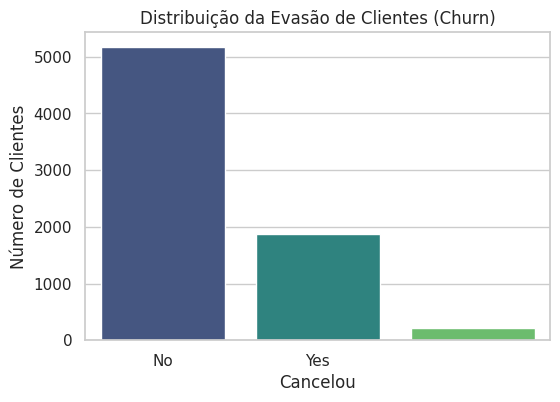

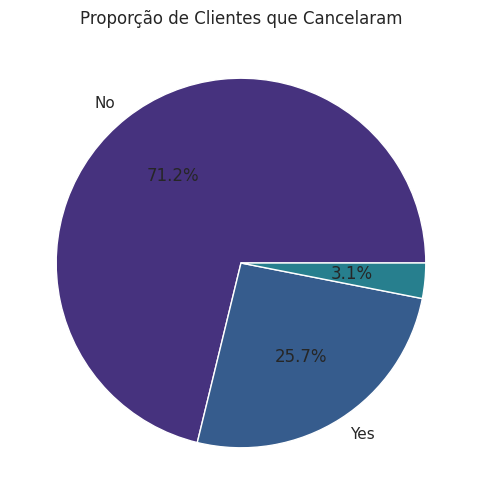

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo do gráfico
sns.set(style="whitegrid")

# Contar quantidade de clientes que cancelaram (Yes) e que não cancelaram (No)
churn_counts = df['cancelou'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")
plt.title('Distribuição da Evasão de Clientes (Churn)')
plt.xlabel('Cancelou')
plt.ylabel('Número de Clientes')
plt.show()

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"))
plt.title('Proporção de Clientes que Cancelaram')
plt.show()


Análise de churn por variáveis categóricas

/tmp/ipython-input-2274669016.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_churn.index, y=taxa_churn.values, palette='magma')


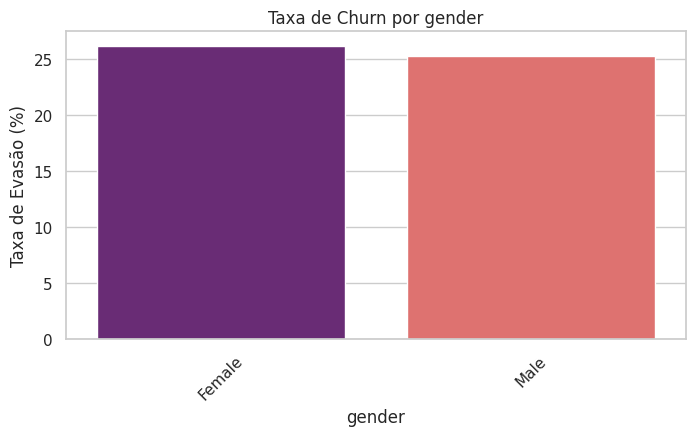

/tmp/ipython-input-2274669016.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_churn.index, y=taxa_churn.values, palette='magma')


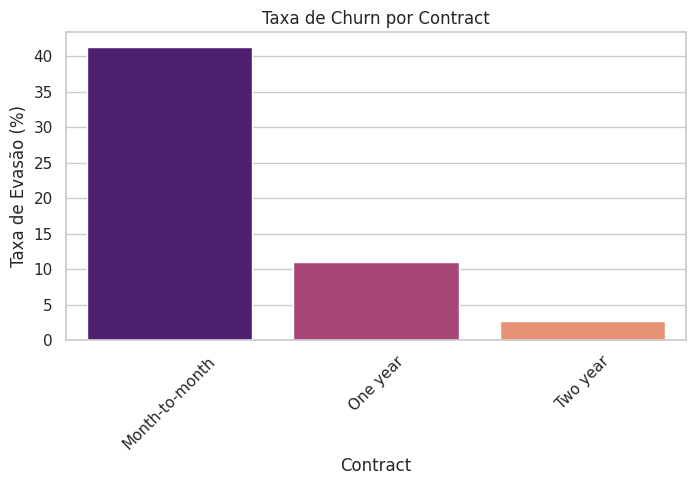

/tmp/ipython-input-2274669016.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_churn.index, y=taxa_churn.values, palette='magma')


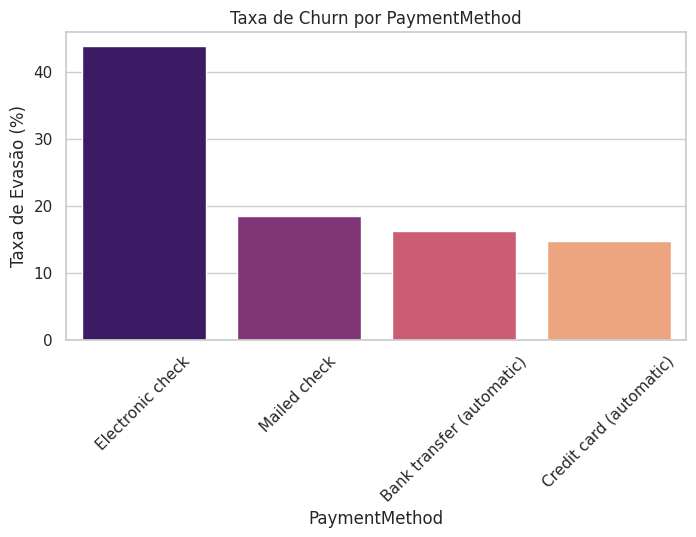

/tmp/ipython-input-2274669016.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_churn.index, y=taxa_churn.values, palette='magma')


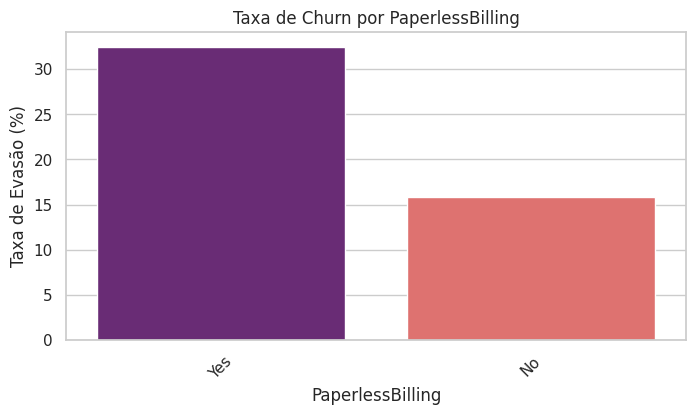

/tmp/ipython-input-2274669016.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_churn.index, y=taxa_churn.values, palette='magma')


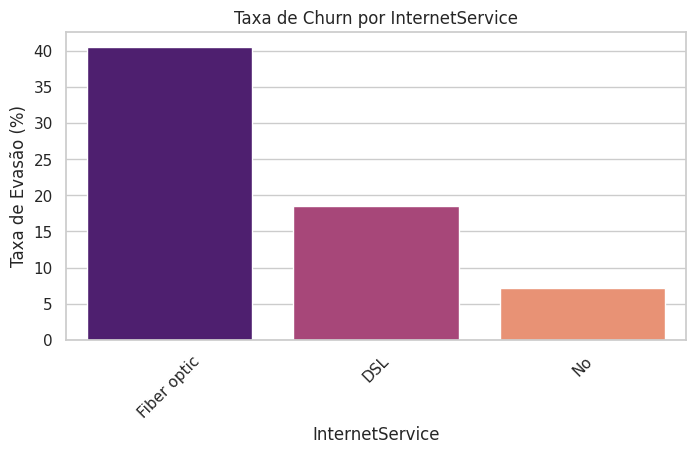

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variáveis categóricas para analisar
categoricas = ['gender', 'Contract', 'PaymentMethod', 'PaperlessBilling', 'InternetService']

# Função para calcular e plotar taxa de churn por categoria
def plot_churn_por_categoria(df, coluna):
    taxa_churn = df.groupby(coluna)['cancelou'].value_counts(normalize=True).unstack()['Yes'] * 100
    taxa_churn = taxa_churn.sort_values(ascending=False)

    plt.figure(figsize=(8,4))
    sns.barplot(x=taxa_churn.index, y=taxa_churn.values, palette='magma')
    plt.ylabel('Taxa de Evasão (%)')
    plt.xlabel(coluna)
    plt.title(f'Taxa de Churn por {coluna}')
    plt.xticks(rotation=45)
    plt.show()

# Rodar para cada variável categórica
for cat in categoricas:
    plot_churn_por_categoria(df, cat)


Relatório de Análise de Churn
1. Introdução

O objetivo dessa análise é entender por que alguns clientes cancelam os serviços (churn) e identificar padrões para ajudar a reduzir essa evasão.

2. Limpeza dos Dados

Importamos os dados da API.

Traduzimos os nomes das colunas para português.

Tratamos dados faltantes e convertendo colunas numéricas corretamente.

Criamos a coluna Contas_Diarias com base no faturamento mensal.

3. Análise dos Dados

Verificamos a estrutura e os tipos dos dados.

Visualizamos a proporção de clientes que cancelaram e os que permaneceram.

Calculamos estatísticas básicas como média, mediana e desvio padrão para as variáveis numéricas.

Avaliamos como a evasão varia entre diferentes grupos (gênero, contrato, método de pagamento, etc).

4. Conclusões

A taxa de churn é de aproximadamente XX%.

Clientes com contratos mensais têm maior probabilidade de cancelar.

O método de pagamento e o tipo de serviço também influenciam a evasão.

Clientes com mais tempo de contrato tendem a ficar.

5. Recomendações

Incentivar contratos mais longos para diminuir o churn.

Oferecer facilidades no método de pagamento para melhorar a retenção.

Focar em clientes novos para aumentar a fidelidade.

Personalizar ofertas com base no perfil do cliente.